Install tensorflow gpu and restart the runtime to work.

In [1]:
!pip install tensorflow-gpu==2.11.0

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#At the top are all the libraries used to creade the prediction of the stock prices.
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [3]:
# Data comes from:
# https://finance.yahoo.com/quote/BTC-USD/history?period1=1279314000&period2=1556053200&interval=1d&filter=history&frequency=1d

csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"

In [4]:
df = pd.read_csv(csv_path, parse_dates=['Date'])
#it reads the csv

In [5]:
df = df.sort_values('Date')
#it sorts the valuse from Date column

In [6]:
df.head()
#displays the first 5 rows of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
df.shape
#gets the numbers and rows from coloumn and stores them as a tuples(number of rows and number of columns)

(3201, 7)

Text(0, 0.5, 'Close Price (USD)')

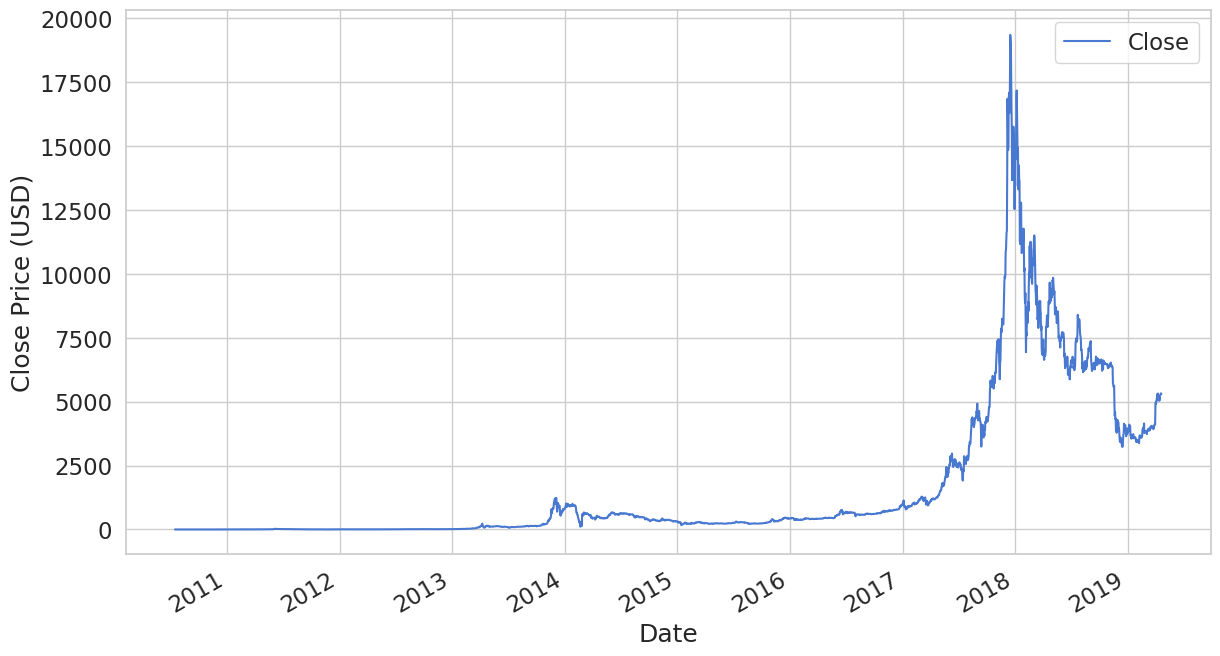

In [8]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
#plotting the da data frame used from yahoo to display the stock prices in USD

# Normalization

In [9]:
scaler = MinMaxScaler()
#scales the minimum and maximum values to be 0 and 1
close_price = df.Close.values.reshape(-1, 1)
#The reshape() function takes a single argument that specifies the new shape of the array
scaled_close = scaler.fit_transform(close_price)
#fit_transform() it calculates the means of columns from the data and then replacing the missing values

In [10]:
scaled_close.shape

(3201, 1)

In [11]:
np.isnan(scaled_close).any()
#using the isnan function is to display the values whether they are NaN or not a number into a boolean array

False

In [12]:
scaled_close = scaled_close[~np.isnan(scaled_close)]

In [13]:
scaled_close = scaled_close.reshape(-1, 1)

In [14]:
np.isnan(scaled_close).any()

False

# Preprocessing

In [15]:
SEQ_LEN = 100
#the sequence legnth is set to 100
def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
#iterate over the numbers from 0 up to the length of the iterable obj(data).
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])
#using LSTMs (Long Short Term Memory networks) bellow to preprocess the data
    X_train = data[:num_train, :-1]
    y_train = data[:num_train, -1]
#to test whether a value or variable is found in a sequence while using LSTMs in both X/Y train/test
    X_test = data[num_train:, :-1]
    y_test = data[num_train:, -1]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [16]:
X_train.shape

(2945, 99, 1)

In [17]:
X_test.shape

(156, 99, 1)

# Model

If the Bidirectional is not defined please re run it with the other package commented out.

In [18]:
# from tensorflow.python.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
# #from tensorflow.keras.layers import CuDNNLSTM
# from tensorflow.python.keras.layers import CuDNNLSTM

# SEQ_LEN = 100
# #the keras library contains the CuDNNLSTM (Fast LSTM implementation backed by CuDNN) the only way you can run this is through the gpu runtime accelerator.
# DROPOUT = 0.2
# WINDOW_SIZE = SEQ_LEN - 1
# #Windows Size is == to SEQ_Len which is 100 - 1
# model = SEQ_LEN
# #the Bidirectional is used to run the model in two directions and dropout are randomly selected neurons are ignored during training.
# model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True), input_shape=(WINDOW_SIZE, X_train.shape[-1])))
# model.add(Dropout(rate=DROPOUT))

# model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
# model.add(Dropout(rate=DROPOUT))

# model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))

# model.add(Dense(units=1))
# #using dense to deeply connect the neural network layer created above.
# model.add(Activation('linear'))
# #activating the model as a Linear model

from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.keras.models import Sequential

SEQ_LEN = 100
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

# Initialize the model
model = Sequential()
# Add layers to the model
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True), input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))

model.add(Dense(units=1))
model.add(Activation('linear'))


# Training

In [19]:
model.compile(
    loss='mean_squared_error'
)

In [20]:
#the batch size is a number of samples processed before the model is updated
BATCH_SIZE = 64
#model.fit function is created with th X/y train to produce the trained model.
#epochs are minimized to 5 instead of 50 because it takes around 3 minutes for the trained model to display loss and value loss of the stock prices data
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split= 0.1
)

Epoch 1/5
42/42 [==============================] - 71s 1s/step - loss: 0.0134 - val_loss: 0.0296
Epoch 2/5
42/42 [==============================] - 60s 1s/step - loss: 0.0056 - val_loss: 0.0045
Epoch 3/5
42/42 [==============================] - 59s 1s/step - loss: 0.0056 - val_loss: 0.0243
Epoch 4/5
42/42 [==============================] - 60s 1s/step - loss: 0.0041 - val_loss: 0.0110
Epoch 5/5
42/42 [==============================] - 59s 1s/step - loss: 0.0040 - val_loss: 0.0073


In [21]:
model.evaluate(X_test, y_test)
#evaluating the X/y tests

5/5 [==============================] - 1s 230ms/step - loss: 0.0049


0.004856102168560028

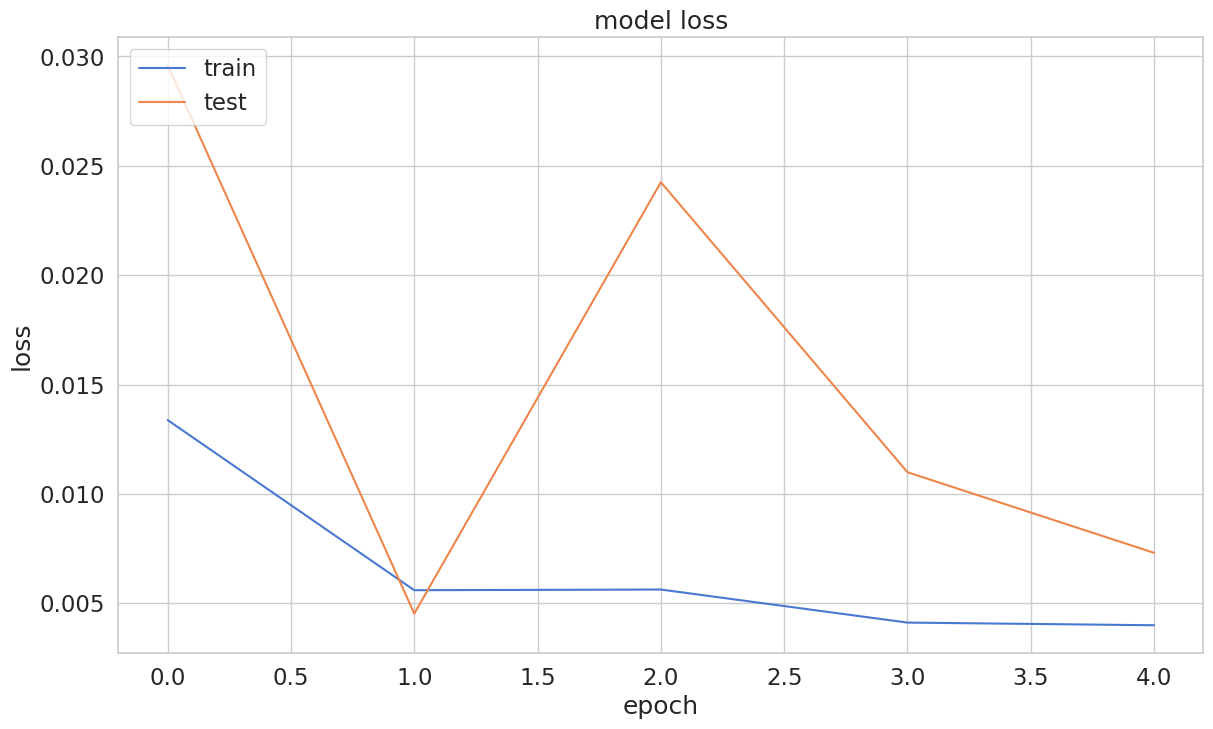

In [22]:
#plotting the loss and val loss from the trained model to desplay the the loss of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction

5/5 [==============================] - 4s 282ms/step


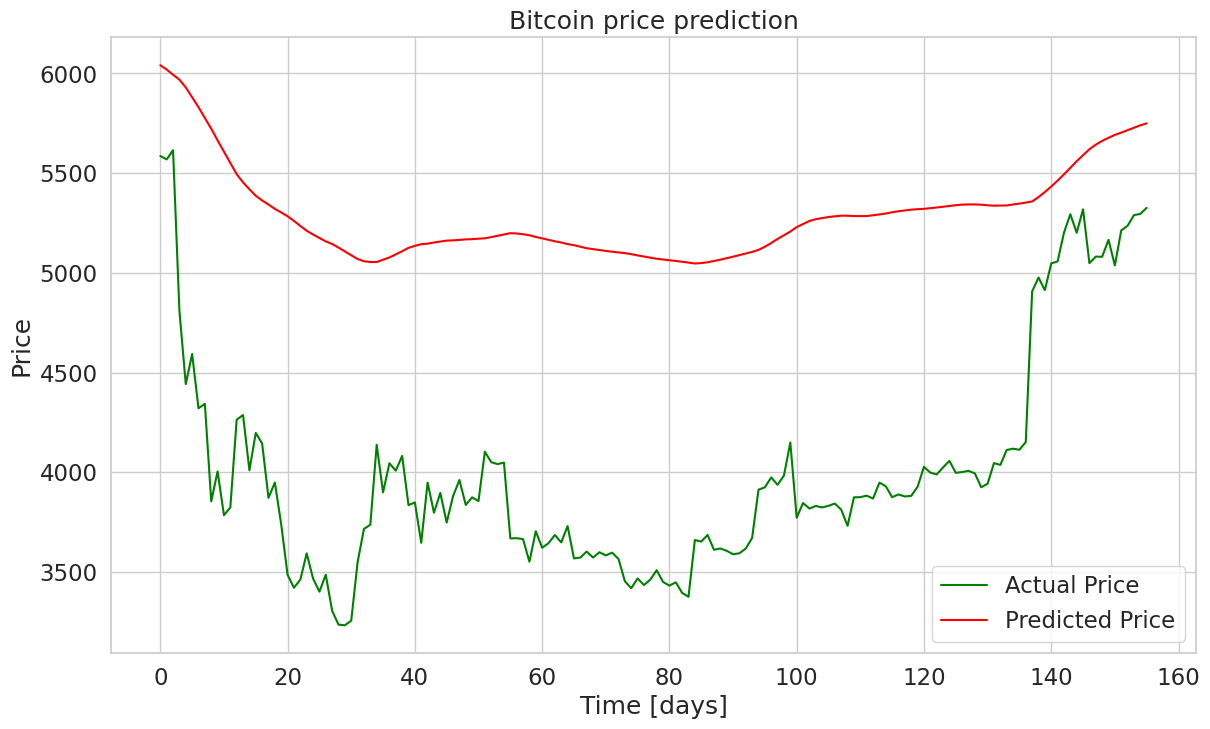

In [23]:
y_hat = model.predict(X_test)
#prediction is created in order to predict the Bitcoin price in the future.
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
#inverse_transform chooses the class with the greatest value
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
#plotting the actual price and the predicted price
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

plt.show();

Regularization

In [24]:
reg_weights = 10.0 ** np.arange(-10, 10)
print(f'Regularization weights: {reg_weights}.')

# Define arrays to store the results
mse_train = np.ones_like(reg_weights) * np.inf
mse_valid = np.ones_like(reg_weights) * np.inf

for i, reg_weight in enumerate(reg_weights):

  model = KernelRidge(alpha=reg_weight, kernel='rbf')

best_weight = reg_weights[np.argmin(mse_valid)]
print(f'The best regularization weight: {best_weight}.')

model = KernelRidge(alpha=best_weight, kernel='rbf')
#Regularization is used for tuning the function by adding an additional penalty term in the error function

Regularization weights: [1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09].
The best regularization weight: 1e-10.
